# Tiempo de ejecución vs Drones (a y b)

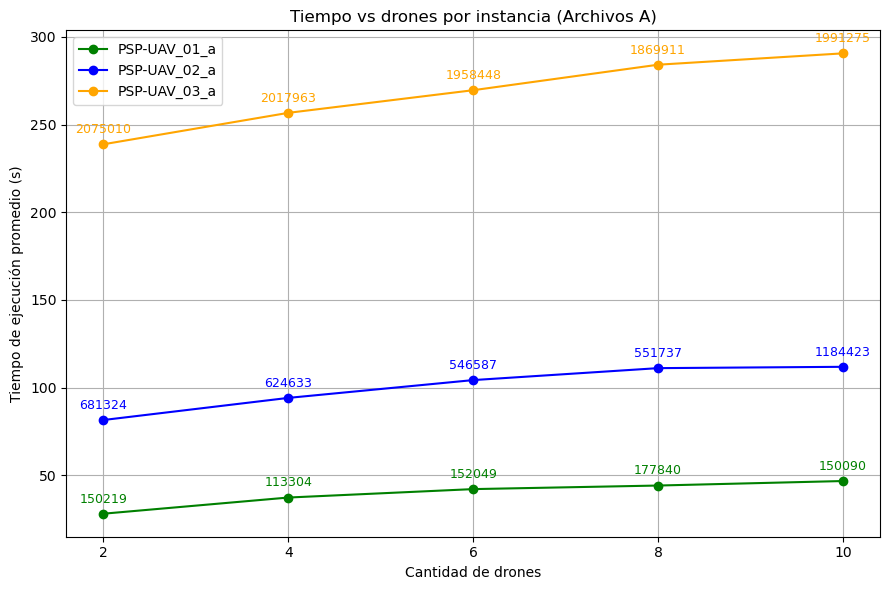

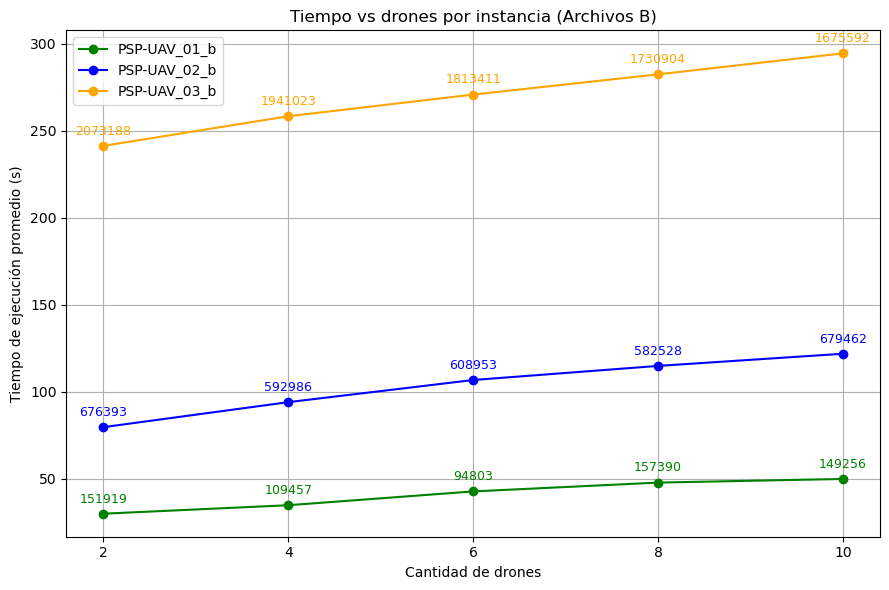

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

HERE = Path(".")

files_a = sorted(HERE.glob("run_*_tiempo_vs_drones_a.csv"))
files_b = sorted(HERE.glob("run_*_tiempo_vs_drones_b.csv"))


def load_and_concat(files):
    dfs = []
    for f in files:
        try:
            dfs.append(pd.read_csv(f))
        except Exception as e:
            print(f"Error leyendo {f}: {e}")
    return pd.concat(dfs, ignore_index=True) if dfs else pd.DataFrame()


df_a = load_and_concat(files_a)
df_b = load_and_concat(files_b)


def plot_por_instancia(df, title, colors):
    if df.empty:
        print(f"No hay datos para {title}")
        return

    plt.figure(figsize=(9, 6))

    # Obtener lista de instancias (PSP-UAV_01, PSP-UAV_02, PSP-UAV_03)
    instancias = df["instance_stem"].unique()

    for inst, color in zip(instancias, colors):
        df_inst = df[df["instance_stem"] == inst]

        promedios = df_inst.groupby("drones").agg({
            "tiempo_ejecucion": "mean",
            "urgencia": "mean"
        }).reset_index()

        # Eje X discreto
        promedios["drones"] = promedios["drones"].astype(str)

        # Línea
        plt.plot(
            promedios["drones"],
            promedios["tiempo_ejecucion"],
            marker="o",
            color=color,
            label=f"{inst}"
        )

        # Anotaciones con urgencia
        for x, y, urg in zip(
            promedios["drones"],
            promedios["tiempo_ejecucion"],
            promedios["urgencia"]
        ):
            plt.annotate(
                f"{int(urg)}",
                xy=(x, y),
                xytext=(0, 8),
                textcoords="offset points",
                ha="center",
                fontsize=9,
                color=color
            )

    plt.title(title)
    plt.xlabel("Cantidad de drones")
    plt.ylabel("Tiempo de ejecución promedio (s)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


# Gráfico A (verde, azul y naranja)
plot_por_instancia(
    df_a,
    "Tiempo vs drones por instancia (Archivos A)",
    colors=["green", "blue", "orange"]
)

# Gráfico B (verde, azul y naranja)
plot_por_instancia(
    df_b,
    "Tiempo vs drones por instancia (Archivos B)",
    colors=["green", "blue", "orange"]
)


# Tiempo de ejecución vs Ticks (a y b)

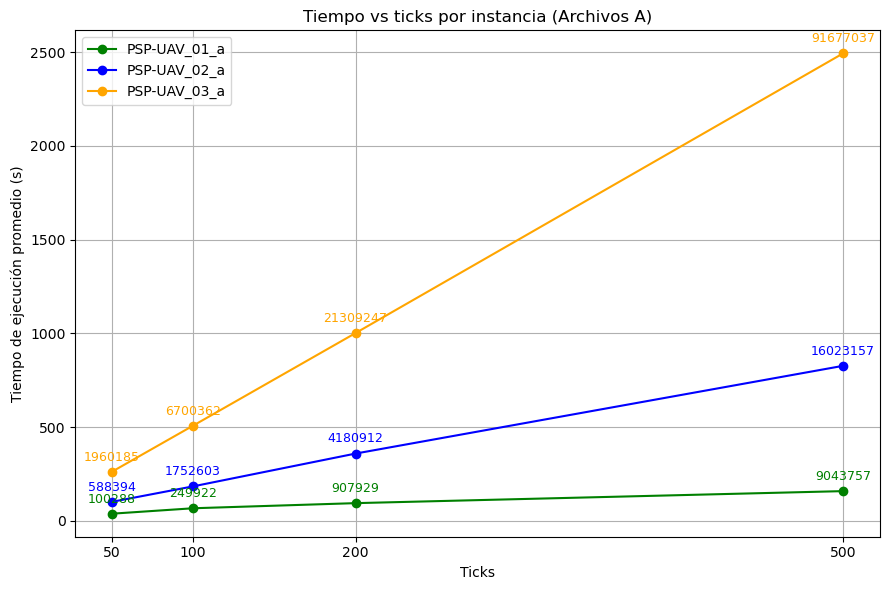

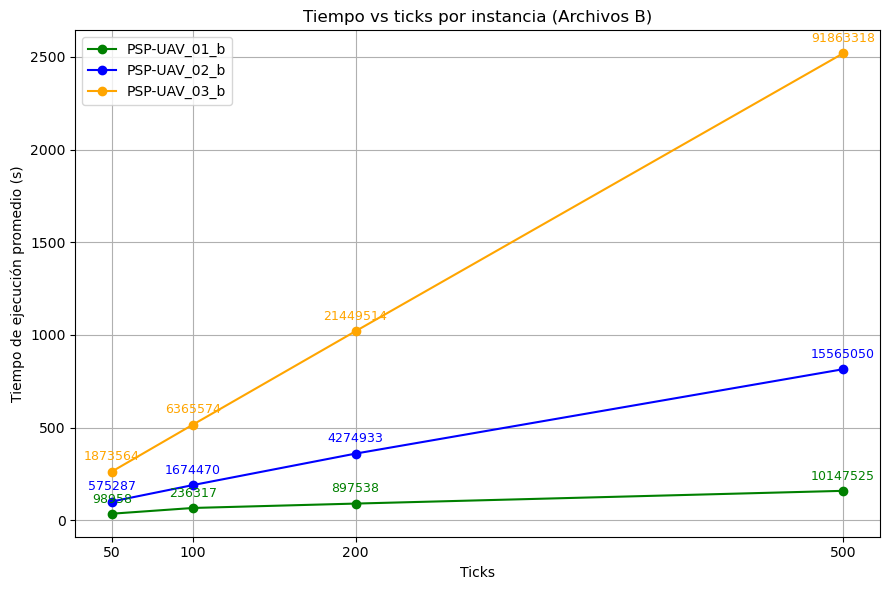

In [2]:
files_ticks_a = sorted(HERE.glob("run_*_tiempo_vs_ticks_a.csv"))
files_ticks_b = sorted(HERE.glob("run_*_tiempo_vs_ticks_b.csv"))

df_ticks_a = load_and_concat(files_ticks_a)
df_ticks_b = load_and_concat(files_ticks_b)


def plot_tiempo_vs_ticks(df, title, colors):
    if df.empty:
        print(f"No hay datos para {title}")
        return

    plt.figure(figsize=(9, 6))
    instancias = df["instance_stem"].unique()

    for inst, color in zip(instancias, colors):
        df_inst = df[df["instance_stem"] == inst]
        promedios = df_inst.groupby("ticks").agg({
            "tiempo_ejecucion": "mean",
            "urgencia": "mean"
        }).reset_index()

        plt.plot(
            promedios["ticks"],
            promedios["tiempo_ejecucion"],
            marker="o",
            color=color,
            label=f"{inst}"
        )

        for x, y, urg in zip(
            promedios["ticks"],
            promedios["tiempo_ejecucion"],
            promedios["urgencia"]
        ):
            plt.annotate(
                f"{int(urg)}",
                xy=(x, y),
                xytext=(0, 8),
                textcoords="offset points",
                ha="center",
                fontsize=9,
                color=color
            )

    plt.title(title)
    plt.xlabel("Ticks")
    plt.xticks(sorted(df["ticks"].unique()))
    plt.ylabel("Tiempo de ejecución promedio (s)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


plot_tiempo_vs_ticks(
    df_ticks_a,
    "Tiempo vs ticks por instancia (Archivos A)",
    colors=["green", "blue", "orange"]
)

plot_tiempo_vs_ticks(
    df_ticks_b,
    "Tiempo vs ticks por instancia (Archivos B)",
    colors=["green", "blue", "orange"]
)


# Valor vs iteraciones a y b

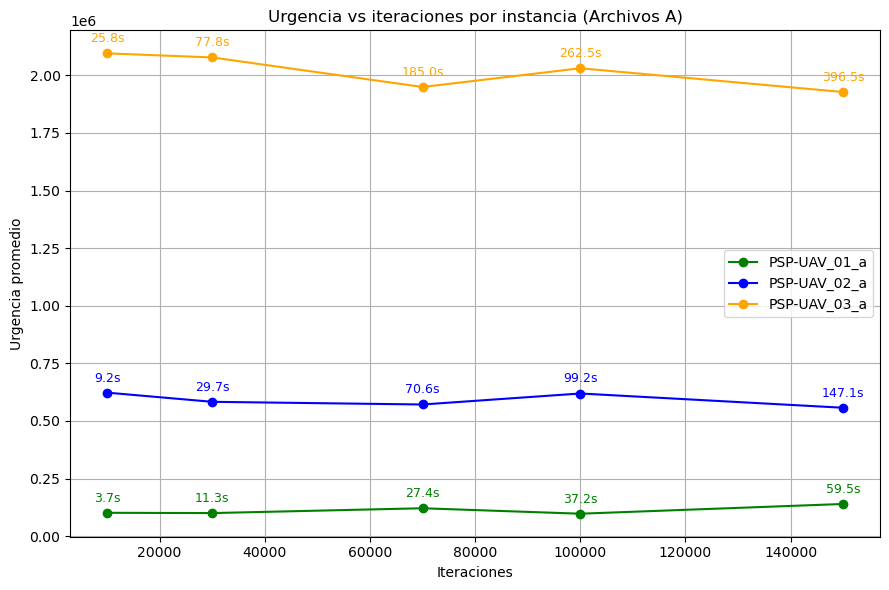

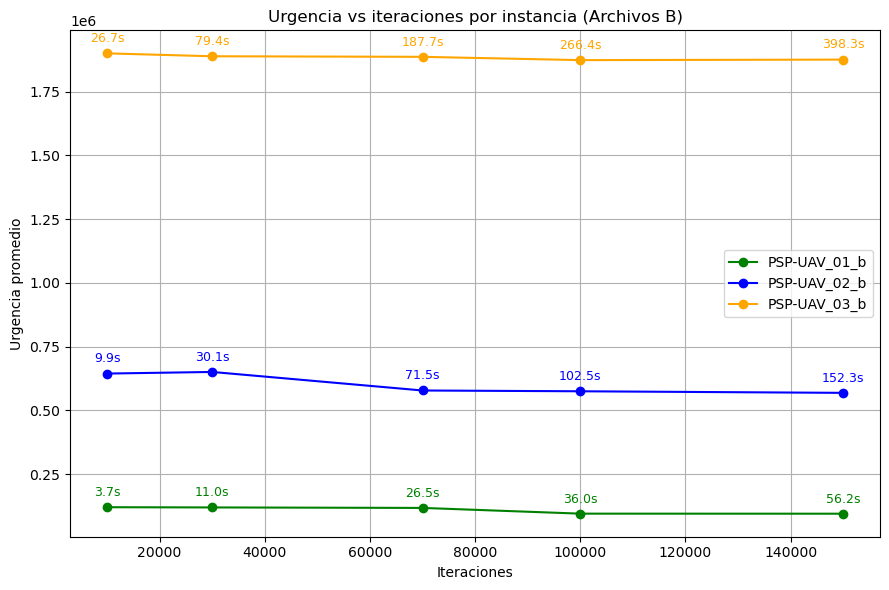

In [3]:
files_valor_a = sorted(HERE.glob("run_*_valor_vs_iteraciones_a.csv"))
files_valor_b = sorted(HERE.glob("run_*_valor_vs_iteraciones_b.csv"))

df_valor_a = load_and_concat(files_valor_a)
df_valor_b = load_and_concat(files_valor_b)


def plot_valor_vs_iteraciones(df, title, colors):
    if df.empty:
        print(f"No hay datos para {title}")
        return

    plt.figure(figsize=(9, 6))
    instancias = df["instance_stem"].unique()

    for inst, color in zip(instancias, colors):
        df_inst = df[df["instance_stem"] == inst]
        promedios = df_inst.groupby("iterations").agg({
            "urgencia": "mean",
            "tiempo_ejecucion": "mean"
        }).reset_index()

        plt.plot(
            promedios["iterations"],
            promedios["urgencia"],
            marker="o",
            color=color,
            label=f"{inst}"
        )

        for x, y, t in zip(
            promedios["iterations"],
            promedios["urgencia"],
            promedios["tiempo_ejecucion"]
        ):
            plt.annotate(
                f"{t:.1f}s",
                xy=(x, y),
                xytext=(0, 8),
                textcoords="offset points",
                ha="center",
                fontsize=9,
                color=color
            )

    plt.title(title)
    plt.xlabel("Iteraciones")
    plt.ylabel("Urgencia promedio")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


plot_valor_vs_iteraciones(
    df_valor_a,
    "Urgencia vs iteraciones por instancia (Archivos A)",
    colors=["green", "blue", "orange"]
)

plot_valor_vs_iteraciones(
    df_valor_b,
    "Urgencia vs iteraciones por instancia (Archivos B)",
    colors=["green", "blue", "orange"]
)

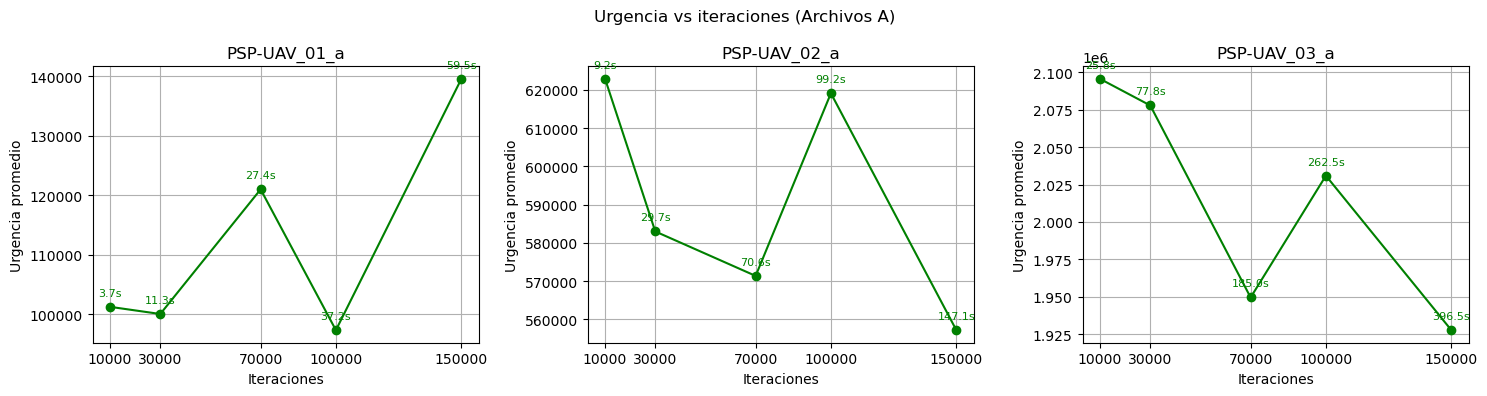

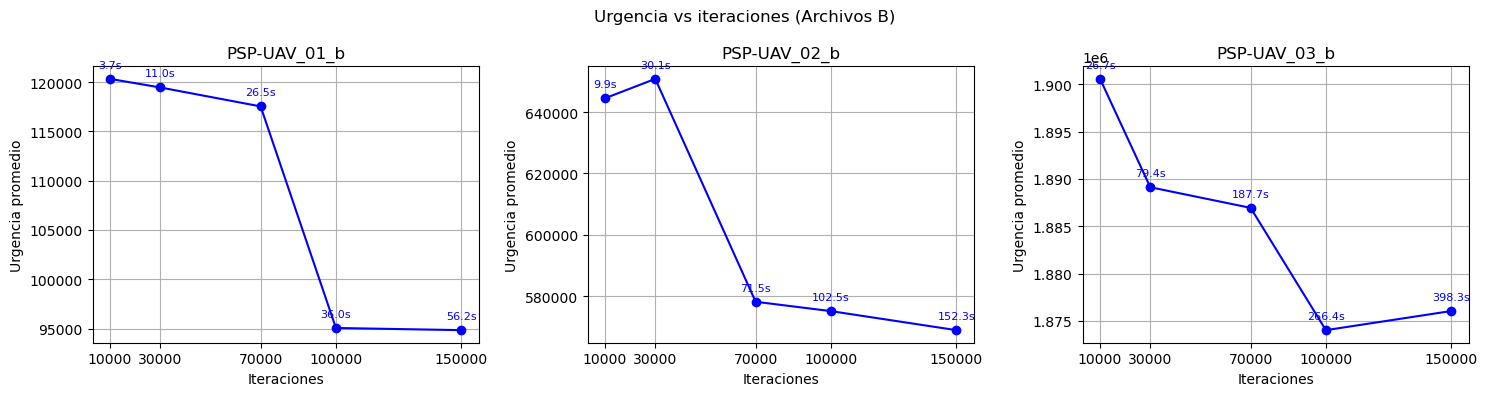

In [4]:
files_valor_a = sorted(HERE.glob("run_*_valor_vs_iteraciones_a.csv"))
files_valor_b = sorted(HERE.glob("run_*_valor_vs_iteraciones_b.csv"))

df_valor_a = load_and_concat(files_valor_a)
df_valor_b = load_and_concat(files_valor_b)


def plot_valor_vs_iteraciones(df, title, colors):
    if df.empty:
        print(f"No hay datos para {title}")
        return
    plt.figure(figsize=(9, 6))
    instancias = df["instance_stem"].unique()
    for inst, color in zip(instancias, colors):
        df_inst = df[df["instance_stem"] == inst]
        promedios = df_inst.groupby("iterations").agg({
            "urgencia": "mean",
            "tiempo_ejecucion": "mean"
        }).reset_index()
        plt.plot(promedios["iterations"], promedios["urgencia"], marker="o", color=color, label=f"{inst}")
        for x, y, t in zip(promedios["iterations"], promedios["urgencia"], promedios["tiempo_ejecucion"]):
            plt.annotate(f"{t:.1f}s", xy=(x, y), xytext=(0, 8), textcoords="offset points", ha="center", fontsize=9, color=color)
    plt.title(title)
    plt.xlabel("Iteraciones")
    plt.xticks(sorted(df["iterations"].unique()))
    plt.ylabel("Urgencia promedio")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_valor_subplots(df, title, color):
    instancias = list(df['instance_stem'].unique())
    if not instancias:
        print(f'No hay datos para {title}')
        return
    fig, axes = plt.subplots(1, len(instancias), figsize=(5*len(instancias), 4), squeeze=False)
    axes = axes[0]
    for ax, inst in zip(axes, instancias):
        df_inst = df[df['instance_stem']==inst]
        promedios = df_inst.groupby('iterations').agg({
            'urgencia':'mean',
            'tiempo_ejecucion':'mean'
        }).reset_index()
        ax.plot(promedios['iterations'], promedios['urgencia'], marker='o', color=color)
        for x,y,t in zip(promedios['iterations'], promedios['urgencia'], promedios['tiempo_ejecucion']):
            ax.annotate(f'{t:.1f}s', xy=(x,y), xytext=(0,8), textcoords='offset points', ha='center', fontsize=8, color=color)
        ax.set_title(inst)
        ax.set_xlabel('Iteraciones')
        ax.set_xticks(sorted(df_inst['iterations'].unique()))
        ax.set_ylabel('Urgencia promedio')
        ax.grid(True)
    fig.suptitle(title)
    fig.tight_layout()
    plt.show()

# Graficos separados por instancia en subplots
plot_valor_subplots(df_valor_a, 'Urgencia vs iteraciones (Archivos A)', color='green')
plot_valor_subplots(df_valor_b, 'Urgencia vs iteraciones (Archivos B)', color='blue')


In [5]:
# Resúmenes tabulares
def resumen(df, group_cols, title):
    if df.empty:
        print(f'No hay datos para {title}')
        return
    agg = df.groupby(group_cols).agg(
        urgencia_mean=('urgencia','mean'),
        urgencia_stdev=('urgencia','std'),
        colisiones_lista=('colisiones', lambda x: [int(v) for v in x]),
        tiempo_mean=('tiempo_ejecucion','mean'),
        tiempo_stdev=('tiempo_ejecucion','std'),
        runs=('urgencia','count'),
    ).reset_index()
    display(title)
    display(agg)

# Drones
resumen(df_a, ['instance_stem','drones'], 'Resumen tiempo_vs_drones_a')
resumen(df_b, ['instance_stem','drones'], 'Resumen tiempo_vs_drones_b')

# Ticks
resumen(df_ticks_a, ['instance_stem','ticks'], 'Resumen tiempo_vs_ticks_a')
resumen(df_ticks_b, ['instance_stem','ticks'], 'Resumen tiempo_vs_ticks_b')

# Iteraciones
resumen(df_valor_a, ['instance_stem','iterations'], 'Resumen valor_vs_iteraciones_a')
resumen(df_valor_b, ['instance_stem','iterations'], 'Resumen valor_vs_iteraciones_b')


'Resumen tiempo_vs_drones_a'

,instance_stem,drones,urgencia_mean,urgencia_stdev,colisiones_lista,tiempo_mean,tiempo_stdev,runs
0,PSP-UAV_01_a,2,150219.0,1701.811976,"[0, 0, 0, 0, 0]",28.05420,1.081244,5
1,PSP-UAV_01_a,4,113304.0,5437.635424,"[0, 0, 0, 0, 0]",37.27384,3.639622,5
2,PSP-UAV_01_a,6,152049.6,102393.227790,"[2, 0, 1, 0, 0]",42.08060,2.403152,5
3,PSP-UAV_01_a,8,177840.8,130440.631956,"[3, 0, 1, 1, 0]",44.11792,1.188237,5
4,PSP-UAV_01_a,10,150090.4,85197.616348,"[0, 2, 1, 1, 0]",46.68796,1.355888,5
5,PSP-UAV_02_a,2,681324.6,6185.671855,"[0, 0, 0, 0, 0]",81.48346,1.965778,5
6,PSP-UAV_02_a,4,624633.4,67133.978769,"[0, 0, 0, 0, 1]",94.09846,4.181407,5
7,PSP-UAV_02_a,6,546587.8,14224.480578,"[0, 0, 0, 0, 0]",104.25160,4.115804,5
8,PSP-UAV_02_a,8,551737.6,164962.647994,"[3, 0, 0, 0, 0]",111.06900,2.966678,5
9,PSP-UAV_02_a,10,1184423.8,272729.349623,"[5, 4, 11, 6, 7]",111.82460,1.839623,5


'Resumen tiempo_vs_drones_b'

,instance_stem,drones,urgencia_mean,urgencia_stdev,colisiones_lista,tiempo_mean,tiempo_stdev,runs
0,PSP-UAV_01_b,2,151919.4,1714.806782,"[0, 0, 0, 0, 0]",29.78102,0.858087,5
1,PSP-UAV_01_b,4,109457.0,7259.503495,"[0, 0, 0, 0, 0]",34.66022,1.846568,5
2,PSP-UAV_01_b,6,94803.2,10592.530326,"[0, 0, 0, 0, 0]",42.60268,2.984214,5
3,PSP-UAV_01_b,8,157390.2,132496.526470,"[1, 3, 0, 0, 0]",47.67440,2.486675,5
4,PSP-UAV_01_b,10,149256.2,86896.710681,"[1, 0, 1, 0, 2]",49.77444,3.321545,5
5,PSP-UAV_02_b,2,676393.4,8122.167617,"[0, 0, 0, 0, 0]",79.56618,5.864929,5
6,PSP-UAV_02_b,4,592986.4,9667.567419,"[0, 0, 0, 0, 0]",93.94514,3.265589,5
7,PSP-UAV_02_b,6,608953.4,65666.671199,"[0, 0, 1, 1, 0]",106.68260,6.971507,5
8,PSP-UAV_02_b,8,582528.0,100866.754538,"[0, 0, 0, 1, 2]",114.80400,4.718437,5
9,PSP-UAV_02_b,10,679462.0,254600.085624,"[1, 1, 0, 1, 6]",121.79260,3.522920,5


'Resumen tiempo_vs_ticks_a'

,instance_stem,ticks,urgencia_mean,urgencia_stdev,colisiones_lista,tiempo_mean,tiempo_stdev,runs
0,PSP-UAV_01_a,50,100288.6,7.497883e+03,"[0, 0, 0, 0, 0]",38.05520,0.915825,5
1,PSP-UAV_01_a,100,249922.4,4.666513e+04,"[1, 0, 0, 0, 0]",67.08086,1.810487,5
2,PSP-UAV_01_a,200,907929.2,4.368331e+04,"[0, 0, 0, 0, 0]",94.42082,2.223077,5
3,PSP-UAV_01_a,500,9043757.0,2.987307e+06,"[5, 0, 0, 1, 2]",158.53040,4.135216,5
4,PSP-UAV_02_a,50,588394.4,7.285885e+04,"[0, 0, 0, 0, 1]",101.28558,2.807319,5
5,PSP-UAV_02_a,100,1752603.2,2.053906e+05,"[0, 1, 0, 0, 1]",183.91180,3.384680,5
6,PSP-UAV_02_a,200,4180912.2,1.037132e+05,"[0, 0, 0, 0, 0]",358.94180,13.427185,5
7,PSP-UAV_02_a,500,16023157.6,1.651259e+06,"[0, 0, 0, 0, 1]",826.91200,12.954212,5
8,PSP-UAV_03_a,50,1960185.6,1.539842e+05,"[2, 0, 0, 0, 1]",261.64760,2.212046,5
9,PSP-UAV_03_a,100,6700362.8,3.465128e+05,"[1, 0, 0, 1, 0]",507.76260,6.487335,5


'Resumen tiempo_vs_ticks_b'

,instance_stem,ticks,urgencia_mean,urgencia_stdev,colisiones_lista,tiempo_mean,tiempo_stdev,runs
0,PSP-UAV_01_b,50,98958.8,6.051540e+03,"[0, 0, 0, 0, 0]",36.01412,1.640705,5
1,PSP-UAV_01_b,100,236317.8,1.501568e+04,"[0, 0, 0, 0, 0]",67.00052,3.612193,5
2,PSP-UAV_01_b,200,897538.4,2.252366e+04,"[0, 0, 0, 0, 0]",90.61336,3.661851,5
3,PSP-UAV_01_b,500,10147525.4,2.513943e+06,"[1, 1, 2, 1, 6]",159.36240,5.902827,5
4,PSP-UAV_02_b,50,575287.4,2.110105e+04,"[0, 0, 0, 0, 0]",101.77440,1.679550,5
5,PSP-UAV_02_b,100,1674470.2,6.414043e+04,"[0, 0, 0, 0, 0]",190.60880,3.894052,5
6,PSP-UAV_02_b,200,4274933.0,1.026551e+05,"[0, 0, 0, 0, 0]",360.23860,10.665701,5
7,PSP-UAV_02_b,500,15565050.0,1.277070e+06,"[1, 0, 0, 0, 0]",815.28440,18.939440,5
8,PSP-UAV_03_b,50,1873564.2,1.603942e+04,"[0, 0, 0, 0, 0]",263.29360,2.066770,5
9,PSP-UAV_03_b,100,6365574.6,4.711903e+04,"[0, 0, 0, 0, 0]",517.02660,4.566687,5


'Resumen valor_vs_iteraciones_a'

,instance_stem,iterations,urgencia_mean,urgencia_stdev,colisiones_lista,tiempo_mean,tiempo_stdev,runs
0,PSP-UAV_01_a,10000,101252.6,9372.579117,"[0, 0, 0, 0, 0]",3.659364,0.104474,5
1,PSP-UAV_01_a,30000,100049.2,8553.461329,"[0, 0, 0, 0, 0]",11.276840,0.550657,5
2,PSP-UAV_01_a,70000,121003.4,52336.501911,"[0, 0, 0, 1, 0]",27.393320,0.889353,5
3,PSP-UAV_01_a,100000,97331.2,5615.887258,"[0, 0, 0, 0, 0]",37.228220,2.329926,5
4,PSP-UAV_01_a,150000,139575.8,98186.615013,"[0, 0, 0, 0, 2]",59.534880,4.984194,5
5,PSP-UAV_02_a,10000,622862.6,67027.993785,"[0, 1, 0, 0, 0]",9.194064,0.599573,5
6,PSP-UAV_02_a,30000,583003.0,25385.409953,"[0, 0, 0, 0, 0]",29.732200,0.518487,5
7,PSP-UAV_02_a,70000,571391.6,17216.940533,"[0, 0, 0, 0, 0]",70.618480,1.591816,5
8,PSP-UAV_02_a,100000,619104.4,118345.640208,"[0, 0, 0, 0, 2]",99.181580,2.962359,5
9,PSP-UAV_02_a,150000,557214.6,17221.039336,"[0, 0, 0, 0, 0]",147.115000,4.125781,5


'Resumen valor_vs_iteraciones_b'

,instance_stem,iterations,urgencia_mean,urgencia_stdev,colisiones_lista,tiempo_mean,tiempo_stdev,runs
0,PSP-UAV_01_b,10000,120318.4,50564.553061,"[0, 1, 0, 0, 0]",3.681802,0.179505,5
1,PSP-UAV_01_b,30000,119449.0,56845.574995,"[0, 0, 0, 0, 1]",10.950680,0.629767,5
2,PSP-UAV_01_b,70000,117528.4,54439.441495,"[0, 0, 0, 0, 1]",26.528760,2.828293,5
3,PSP-UAV_01_b,100000,95062.6,2552.146117,"[0, 0, 0, 0, 0]",36.033680,1.486826,5
4,PSP-UAV_01_b,150000,94841.0,6512.614721,"[0, 0, 0, 0, 0]",56.214220,3.254598,5
5,PSP-UAV_02_b,10000,644554.2,76752.592176,"[1, 0, 0, 1, 0]",9.899314,0.637595,5
6,PSP-UAV_02_b,30000,650861.2,104952.892034,"[0, 0, 2, 1, 0]",30.102820,1.054436,5
7,PSP-UAV_02_b,70000,578129.0,11244.881791,"[0, 0, 0, 0, 0]",71.515920,2.337844,5
8,PSP-UAV_02_b,100000,575075.0,17779.523489,"[0, 0, 0, 0, 0]",102.482300,2.154979,5
9,PSP-UAV_02_b,150000,568862.6,9323.760443,"[0, 0, 0, 0, 0]",152.282200,3.731589,5
